In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('D:/Python Projects/Clustering/K-Means/iris.csv')

In [3]:
df.head()

,PetalLengthCm,PetalWidthCm,Species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [7]:
df1=df.drop('Species',axis='columns')

In [8]:
df1.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


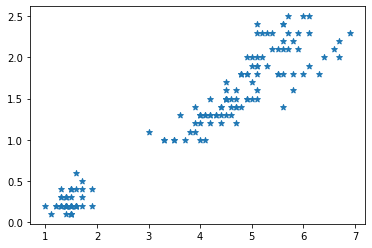

In [9]:
plt.scatter(df1['PetalLengthCm'], df1['PetalWidthCm'], marker="*")

In [10]:
km=KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [11]:
y_predicted=km.fit_predict(df1[['PetalLengthCm','PetalWidthCm']])

In [12]:
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
df1['cluster']=y_predicted
df1.head()

,PetalLengthCm,PetalWidthCm,cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [22]:
df1.to_csv('D:/Python Projects/Clustering/K-Means/iris_predicted.csv')

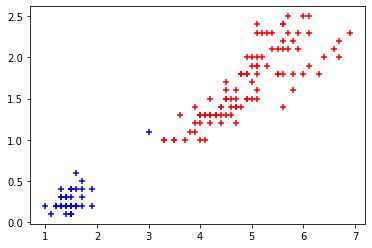

In [15]:
df10=df1[df1.cluster == 0]
df11=df1[df1.cluster == 1]
plt.scatter(df10['PetalLengthCm'],df10['PetalWidthCm'], marker="+", color="blue")
plt.scatter(df11['PetalLengthCm'],df11['PetalWidthCm'], marker="+", color="red")

In [16]:
km.cluster_centers_

array([[1.49411765, 0.26078431],
       [4.92525253, 1.68181818]])

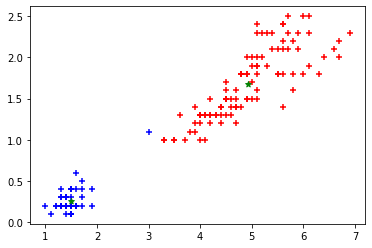

In [18]:
df10=df1[df1.cluster == 0]
df11=df1[df1.cluster == 1]
plt.scatter(df10['PetalLengthCm'],df10['PetalWidthCm'], marker="+", color="blue")
plt.scatter(df11['PetalLengthCm'],df11['PetalWidthCm'], marker="+", color="red")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker="*",color="green")

In [19]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df1[['PetalLengthCm','PetalWidthCm']])
    sse.append(km.inertia_)

C:\Users\amit\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
sse

[550.6434666666671,
 86.40394533570999,
 31.38775897435898,
 19.499400899685114,
 13.999613141025645,
 11.10362366260479,
 9.201475914423737,
 7.756503428862016,
 6.472894541406304]

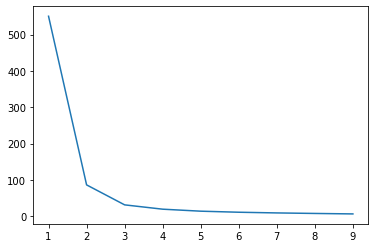

In [21]:
plt.plot(k_range,sse)